## Imports

In [60]:
# Imports 

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

## Reading Data

In [62]:
# Load data

df = pd.read_excel('../Bootcamp Data/churn.xlsx')

## EDA

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [65]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [66]:
df.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [67]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [68]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

## Data Preparation

In [70]:
# Dropping nulls, repetitive variables, and unneeded variables

df = df.drop(['Churn Reason', 'Count', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 
              'Senior Citizen', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Churn Score', 
              'Churn Label', 'CLTV', 'CustomerID', 'Country'], axis=1)

In [77]:
# Changing dtypes 

df['Total Charges'] = pd.to_numeric(df['Total Charges'],errors = 'coerce')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              7043 non-null   object 
 1   Gender             7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Total Charges      7032 non-null   float64
 16  Churn Value        7043 

In [91]:
# Encoding categorical variables

encoder = OneHotEncoder(drop='first', sparse_output = False)

encode_cols = encoder.fit_transform(df[['State', 'Gender', 'Partner', 'Dependents','Phone Service', 'Multiple Lines', 
                                       'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 
                                       'Streaming TV', 'Streaming Movies', 'Contract']])

new_df = pd.DataFrame(encode_cols, columns= encoder.get_feature_names_out(['State', 'Gender', 'Partner', 'Dependents','Phone Service', 'Multiple Lines', 
                                       'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 
                                       'Streaming TV', 'Streaming Movies', 'Contract']))

df = df.drop(columns=['State', 'Gender', 'Partner', 'Dependents','Phone Service', 'Multiple Lines', 
                                       'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 
                                       'Streaming TV', 'Streaming Movies', 'Contract']).join(new_df)

In [106]:
# Correlation with target 

df.corr(method='pearson')['Churn Value']

Tenure Months                           -0.352229
Total Charges                           -0.199484
Churn Value                              1.000000
Gender_Male                             -0.008612
Partner_Yes                             -0.150448
Dependents_Yes                          -0.248542
Phone Service_Yes                        0.011942
Multiple Lines_No phone service         -0.011942
Multiple Lines_Yes                       0.040102
Internet Service_Fiber optic             0.308020
Internet Service_No                     -0.227890
Online Security_No internet service     -0.227890
Online Security_Yes                     -0.171226
Online Backup_No internet service       -0.227890
Online Backup_Yes                       -0.082255
Device Protection_No internet service   -0.227890
Device Protection_Yes                   -0.066160
Tech Support_No internet service        -0.227890
Tech Support_Yes                        -0.164674
Streaming TV_No internet service        -0.227890


<Axes: >

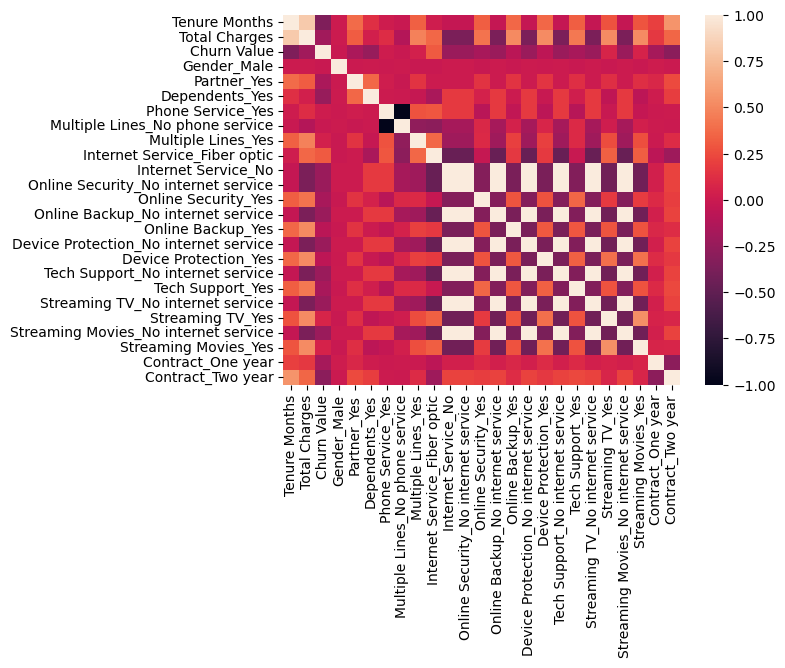

In [93]:
# Heatmap

matrix = df.corr(method='pearson', min_periods=1, numeric_only=True)

sns.heatmap(data=matrix)

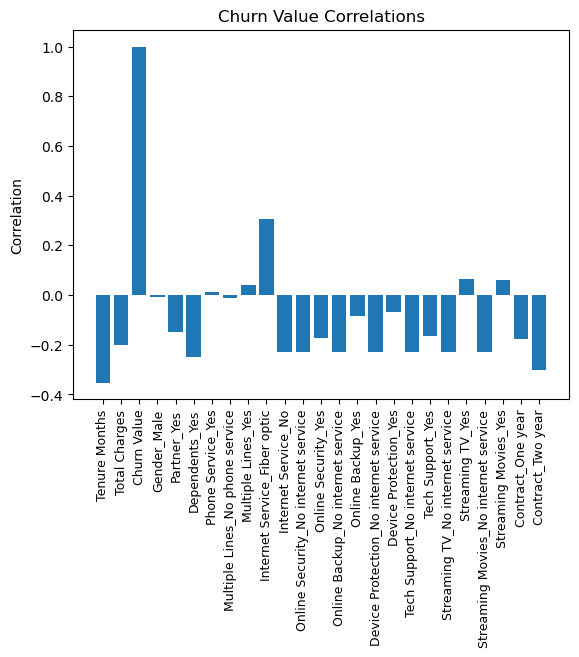

In [97]:
# Bar plot of correlations 

corr_churn = df.corr(method='pearson')['Churn Value'].reset_index(name='Correlation')

# Plotting correlations

plt.bar(data=corr_churn, x='index', height='Correlation')

plt.title('Churn Value Correlations')

plt.ylabel('Correlation')

plt.xticks(rotation=90, size=9)

plt.show()

In [104]:
# Absolute correlation values

df.corr(method='pearson')['Churn Value'].abs().sort_values(ascending=False)

Churn Value                              1.000000
Tenure Months                            0.352229
Internet Service_Fiber optic             0.308020
Contract_Two year                        0.302253
Dependents_Yes                           0.248542
Internet Service_No                      0.227890
Online Security_No internet service      0.227890
Streaming Movies_No internet service     0.227890
Device Protection_No internet service    0.227890
Streaming TV_No internet service         0.227890
Online Backup_No internet service        0.227890
Tech Support_No internet service         0.227890
Total Charges                            0.199484
Contract_One year                        0.177820
Online Security_Yes                      0.171226
Tech Support_Yes                         0.164674
Partner_Yes                              0.150448
Online Backup_Yes                        0.082255
Device Protection_Yes                    0.066160
Streaming TV_Yes                         0.063228


## Model 1

In [ ]:
# Variables of interest for x